In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import math

In [2]:
train=pd.read_csv(r"C:/Users/coich/Documents/TIDE/Celisse/projet/train.csv")
test=pd.read_csv(r"C:/Users/coich/Documents/TIDE/Celisse/projet/test.csv")

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


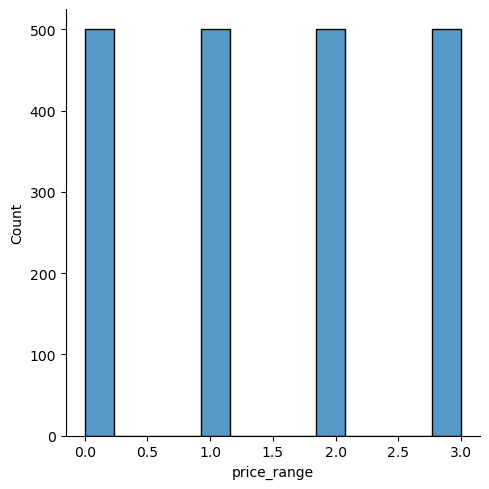

In [6]:
sns.displot(train["price_range"])

<AxesSubplot:>

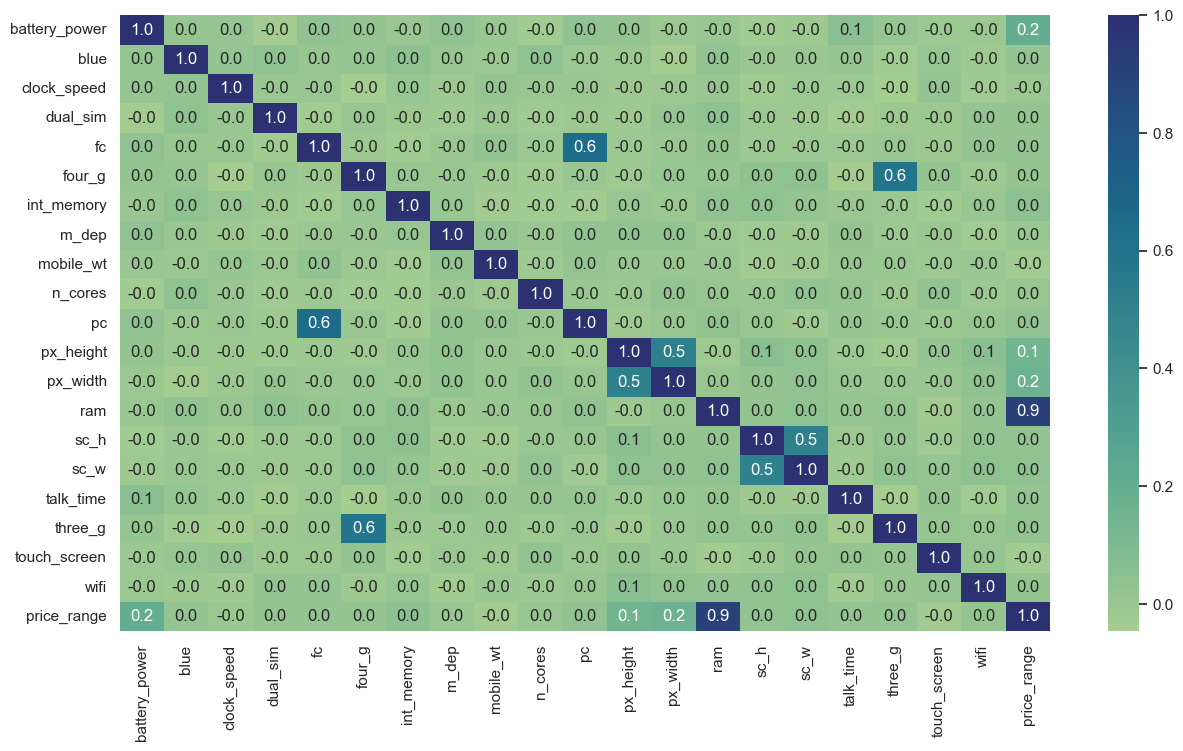

In [7]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(train.astype(float).corr(), annot=True, fmt=".1f", cmap="crest")

<AxesSubplot:xlabel='ram', ylabel='Count'>

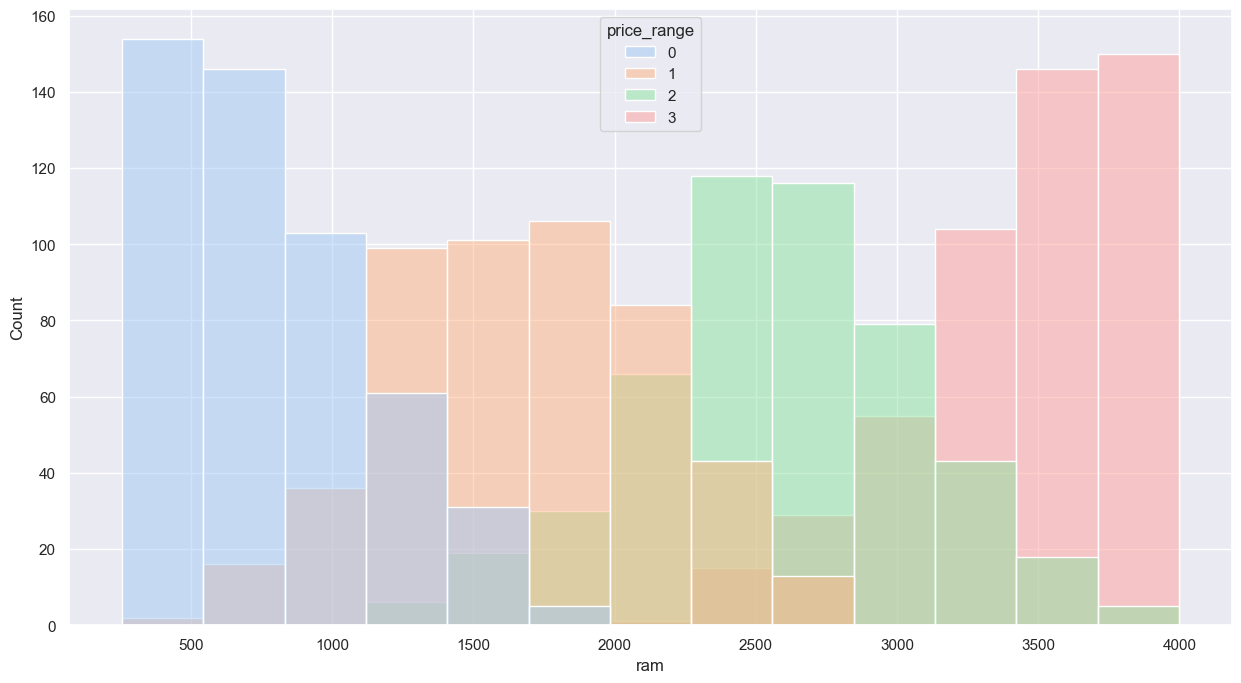

In [8]:
sns.histplot(data=train, x="ram", hue="price_range", palette="pastel")

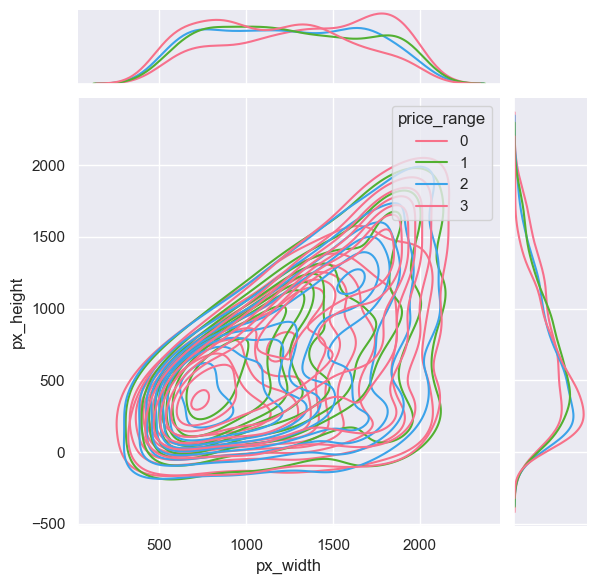

In [9]:
sns.jointplot(data=train, x="px_width",y="px_height",hue="price_range",kind='kde',palette="husl")


In [10]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [11]:
train_vars=train[["battery_power","px_height","px_width","ram"]]
test_vars=test[["battery_power","px_height","px_width","ram"]]
var=pd.concat([train_vars,test_vars])
var=var.reset_index()
var=var.drop(columns=["index"])
for i,row in var.iterrows():
    if i<2000 :
        var.loc[i,["base"]]="train"
    else :
        var.loc[i,["base"]]="test" 
var

,battery_power,px_height,px_width,ram,base
0,842,20,756,2549,train
1,1021,905,1988,2631,train
2,563,1263,1716,2603,train
3,615,1216,1786,2769,train
4,1821,1208,1212,1411,train
...,...,...,...,...,...
2995,1700,644,913,2121,test
2996,609,1152,1632,1933,test
2997,1185,477,825,1223,test
2998,1533,38,832,2509,test


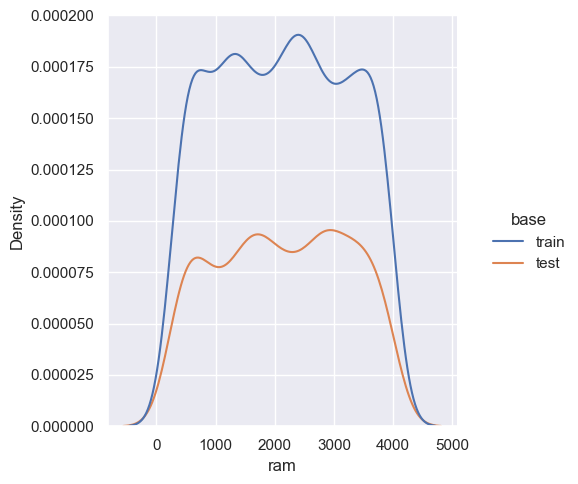

In [12]:
sns.displot(data=var,x="ram",hue="base",kind="kde")

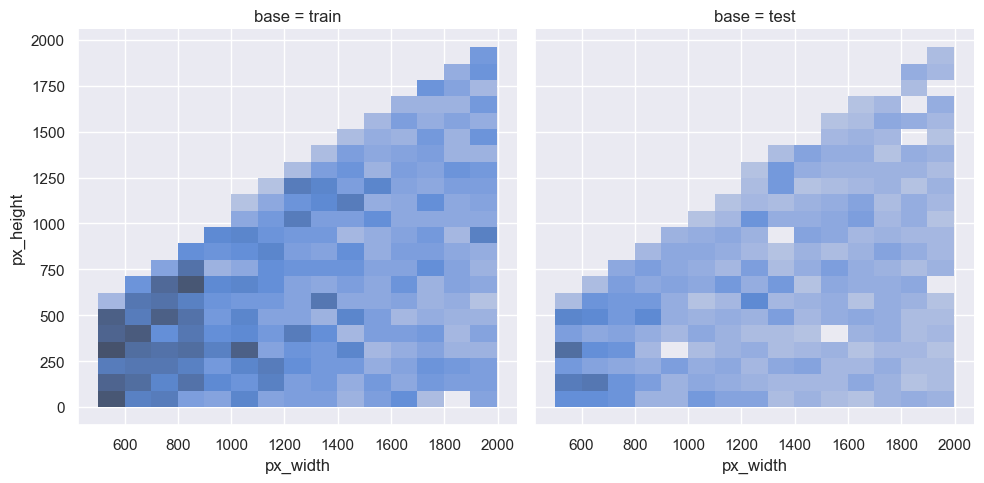

In [13]:
sns.displot(data=var,x="px_width",y="px_height",col="base")

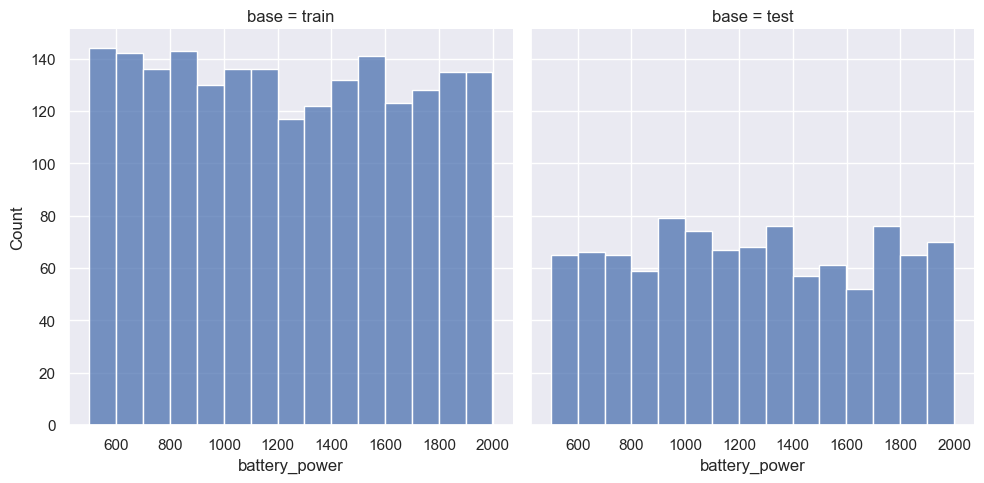

In [14]:
sns.displot(data=var,x="battery_power",col='base')

# Sélection de modèles et prédictions

In [54]:
from sklearn.model_selection import train_test_split
X=train.drop(columns=["price_range"])
y=train.price_range
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, random_state = 0)

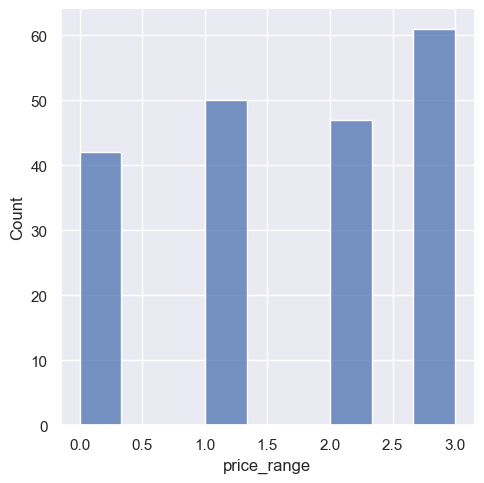

In [55]:
## on vérifie la répartition de price_range dans y_valid
sns.displot(y_valid)
## la répartition est assez uniforme pas complètement mais on a aucune assurance que ça doit l'être dans la vraie base test

In [56]:
scaler= StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid),columns=X_train.columns)

# Modèles "basiques"

# Régression logistique

In [57]:
modele_regression_logistique = linear_model.LogisticRegression ()
modele_regression_logistique.fit(X_train, y_train)
train_pred=modele_regression_logistique.predict(X_train)
valid_pred=modele_regression_logistique.predict(X_valid)
(accuracy_score(y_train, train_pred),accuracy_score(y_valid, valid_pred))

(0.9805555555555555, 0.965)

In [58]:
accur=[]
for i in (['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']):
    modele_regression_logistique2 = linear_model.LogisticRegression (solver=i)
    modele_regression_logistique2.fit(X_train, y_train)
    predictions=modele_regression_logistique2.predict(X_valid)
    accur.append(accuracy_score(y_valid, predictions))


In [59]:
accur ### pas de gains de performance selon l'algo d'optimisation

[0.965, 0.82, 0.965, 0.965, 0.965]

# Modèles d'arbre

# Classification tree

In [60]:
from sklearn import tree
model_tree=tree.DecisionTreeClassifier()
model_tree=model.fit(X_train,y_train)

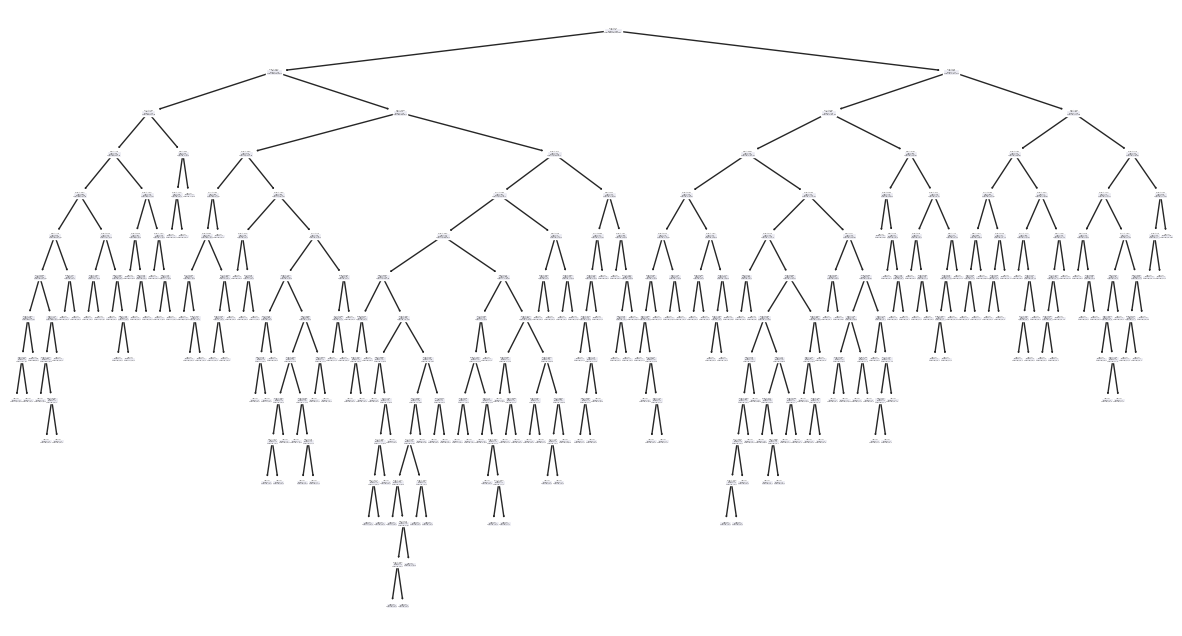

In [38]:
tree.plot_tree(model_tree)
plt.show()
### Evidemment ici l'arbre ici n'est pas l'idéal, il maximise les bons clasements sur les onnées d'entrainement 
### mais étant beaucoup trop collés à celle-ci (overfitting) il cause trop d'erreurs sur valid

In [61]:
train_pred=model_tree.predict(X_train)
test_pred=model_tree.predict(X_valid)

In [62]:
(accuracy_score(y_train, train_pred),accuracy_score(y_valid, test_pred)) 

(1.0, 0.86)

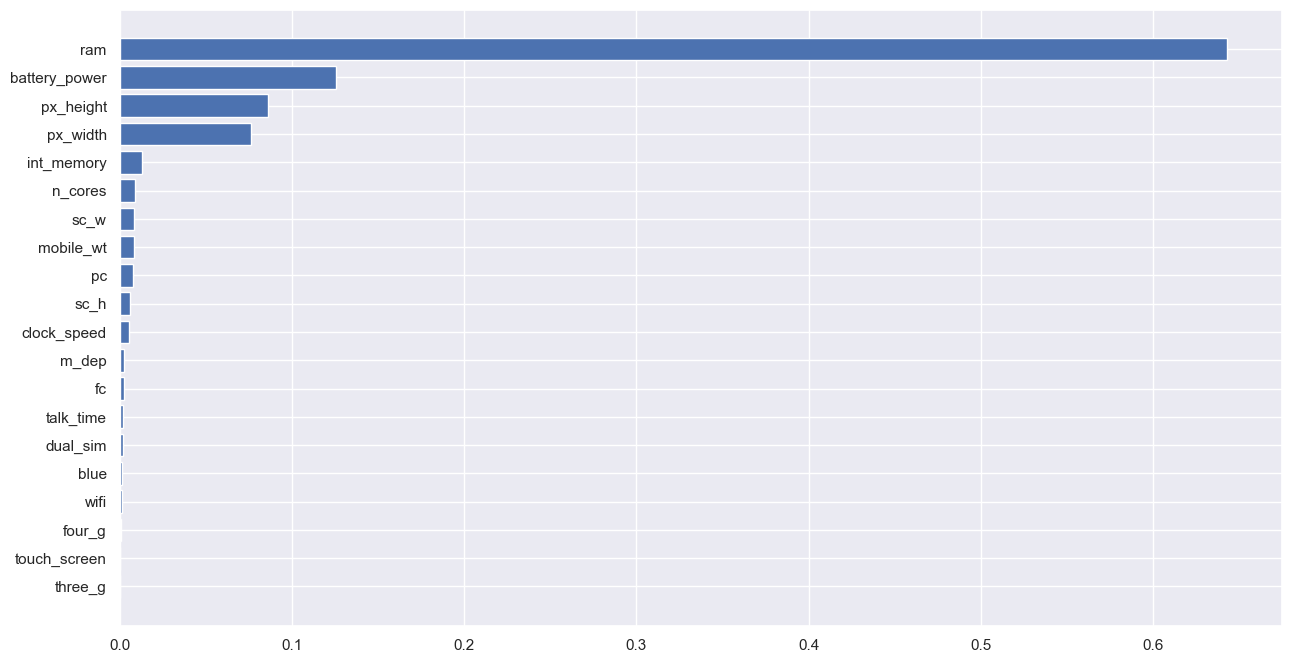

In [63]:
importance=model_tree.feature_importances_
indices = np.argsort(importance)

fig, ax = plt.subplots()
ax.barh(range(len(indices)), importance[indices])
ax.set_yticks(range(len(indices)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

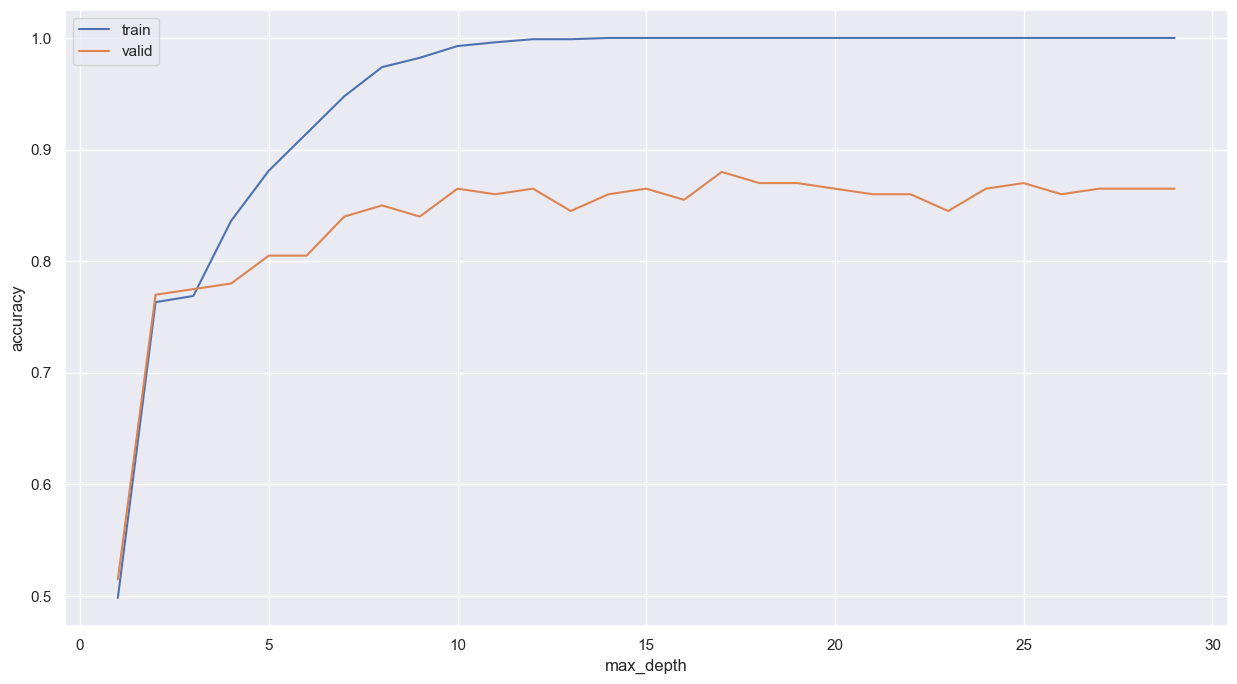

In [64]:
max_depth = []
acc_train = []
acc_test = []
for i in range(1,30):
        dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
        dtree.fit(X_train, y_train)
        pred = dtree.predict(X_train)
        acc_train.append(accuracy_score(y_train, pred))
 ####
        dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
        dtree.fit(X_train, y_train)
        pred = dtree.predict(X_valid)
        acc_test.append(accuracy_score(y_valid, pred))
 ####
        max_depth.append(i)
d = pd.DataFrame({'acc_train':pd.Series(acc_train), 
         'acc_test':pd.Series(acc_test),
         'max_depth':pd.Series(max_depth)})# visualizing changes in parameters
plt.plot('max_depth','acc_train', data=d, label='train')
plt.plot('max_depth','acc_test', data=d, label='valid')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

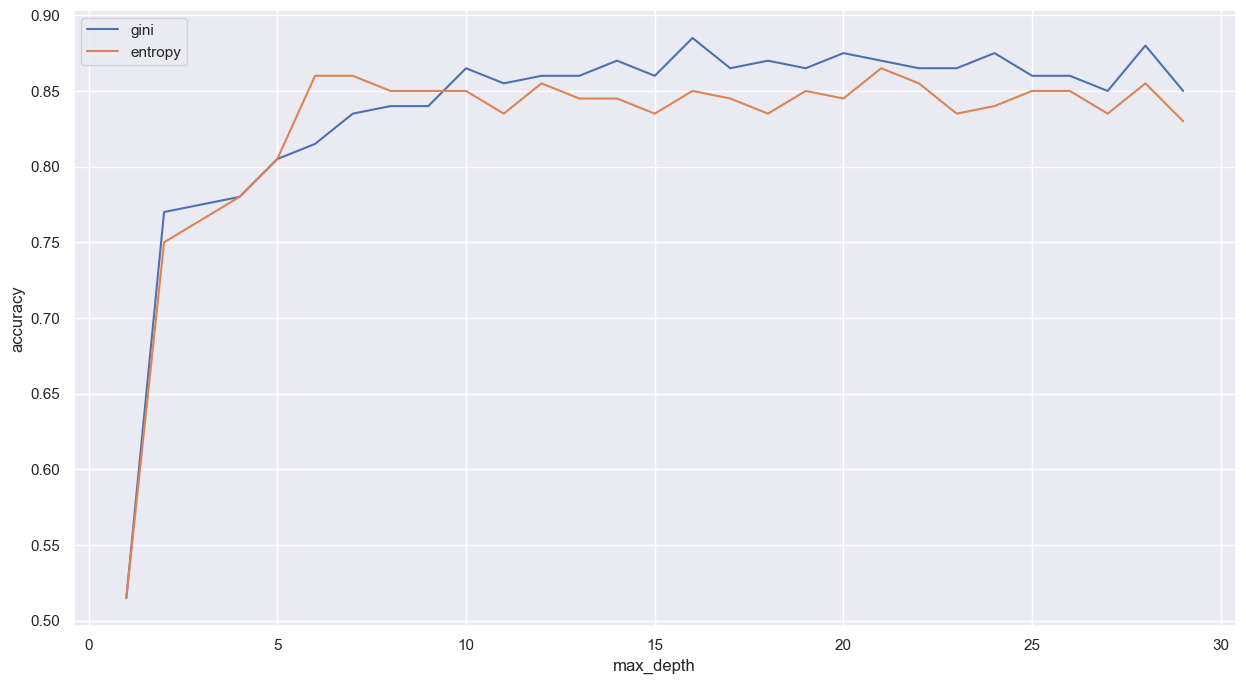

In [65]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
        dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
        dtree.fit(X_train, y_train)
        pred = dtree.predict(X_valid)
        acc_gini.append(accuracy_score(y_valid, pred))
 ####
        dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
        dtree.fit(X_train, y_train)
        pred = dtree.predict(X_valid)
        acc_entropy.append(accuracy_score(y_valid, pred))
 ####
        max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
         'acc_entropy':pd.Series(acc_entropy),
         'max_depth':pd.Series(max_depth)})# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [66]:
model_tree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=6)
model_tree=model_tree.fit(X_train,y_train)

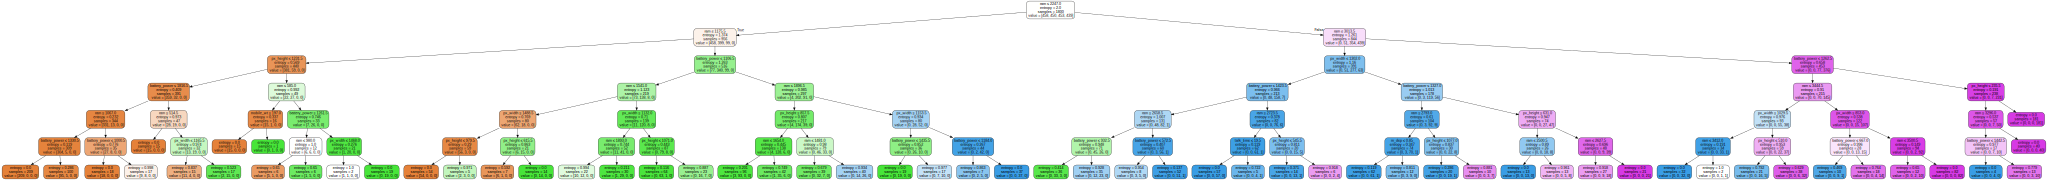

In [25]:
#### Prend du temps à se lancer pas nécéssaire

import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=X_train.columns,    
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [68]:
train_pred=model_tree.predict(X_train)
test_pred=model_tree.predict(X_valid)

In [70]:
(accuracy_score(y_train, train_pred),accuracy_score(y_valid, test_pred)) 

(0.9161111111111111, 0.86)

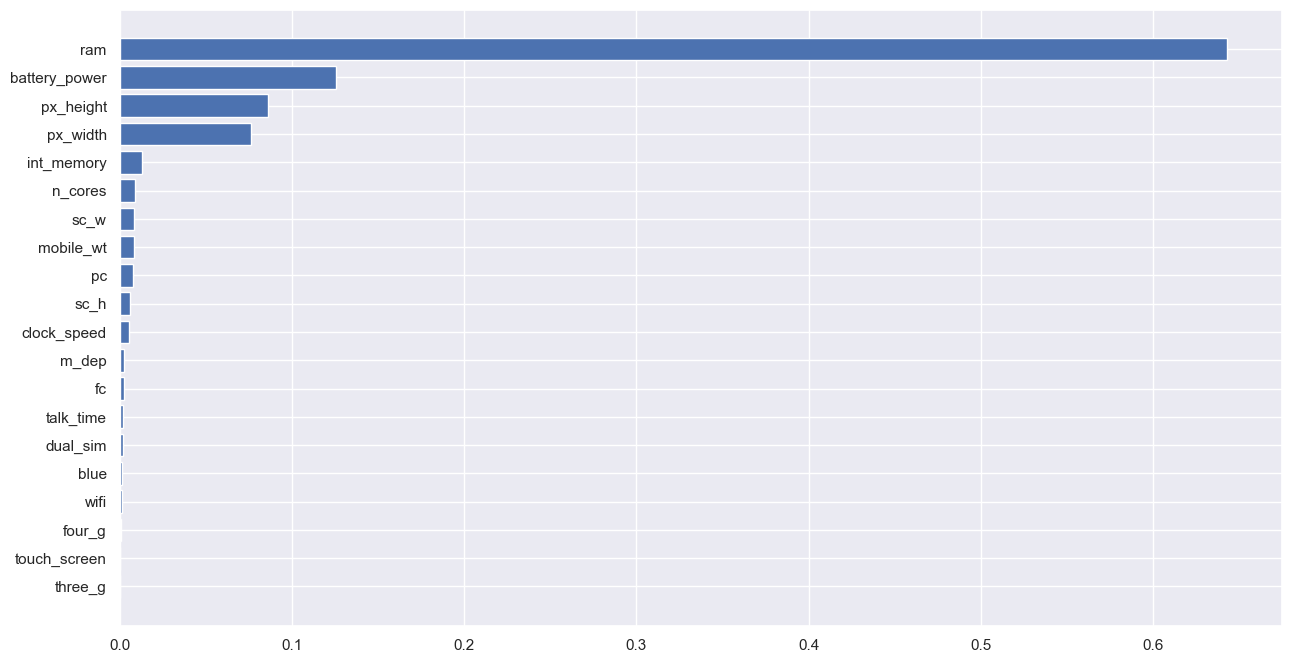

In [71]:
importance=model.feature_importances_
indices = np.argsort(importance)

fig, ax = plt.subplots()
ax.barh(range(len(indices)), importance[indices])
ax.set_yticks(range(len(indices)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

# Random forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
model_rf= RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
train_pred=model_rf.predict(X_train)
test_pred=model_rf.predict(X_valid)

In [76]:
(accuracy_score(y_train, train_pred),accuracy_score(y_valid, test_pred)) 

(1.0, 0.87)

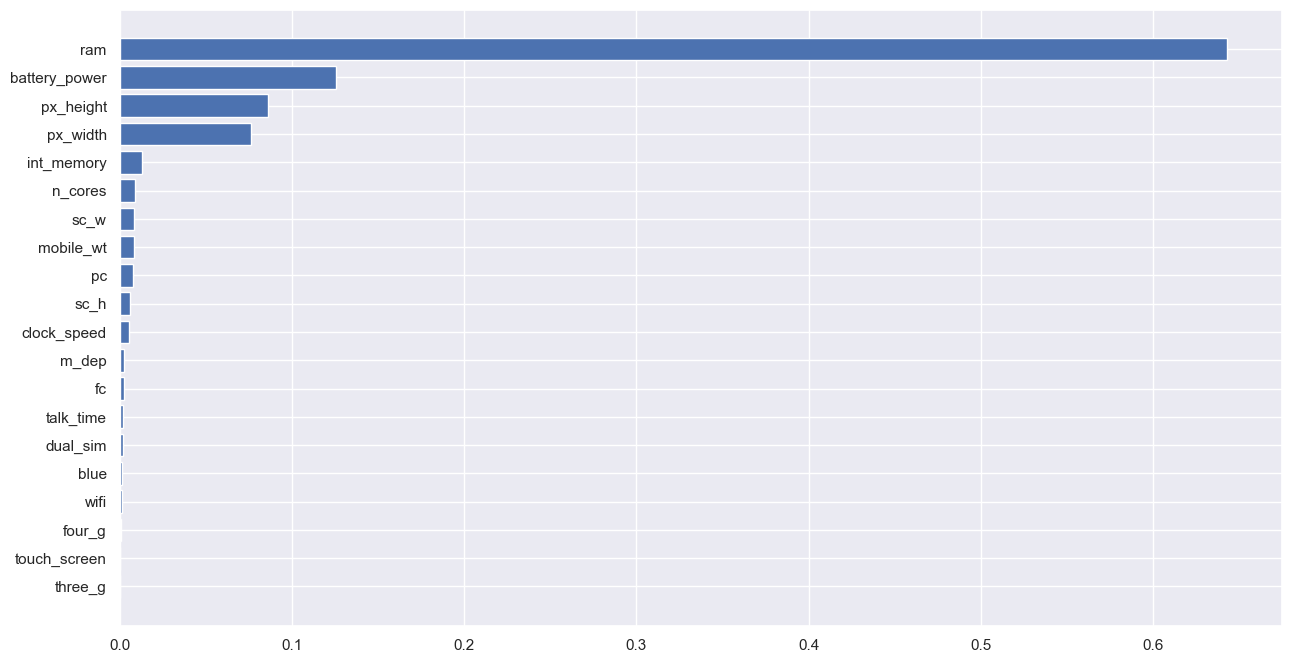

In [77]:
importance=model.feature_importances_
indices = np.argsort(importance)

fig, ax = plt.subplots()
ax.barh(range(len(indices)), importance[indices])
ax.set_yticks(range(len(indices)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

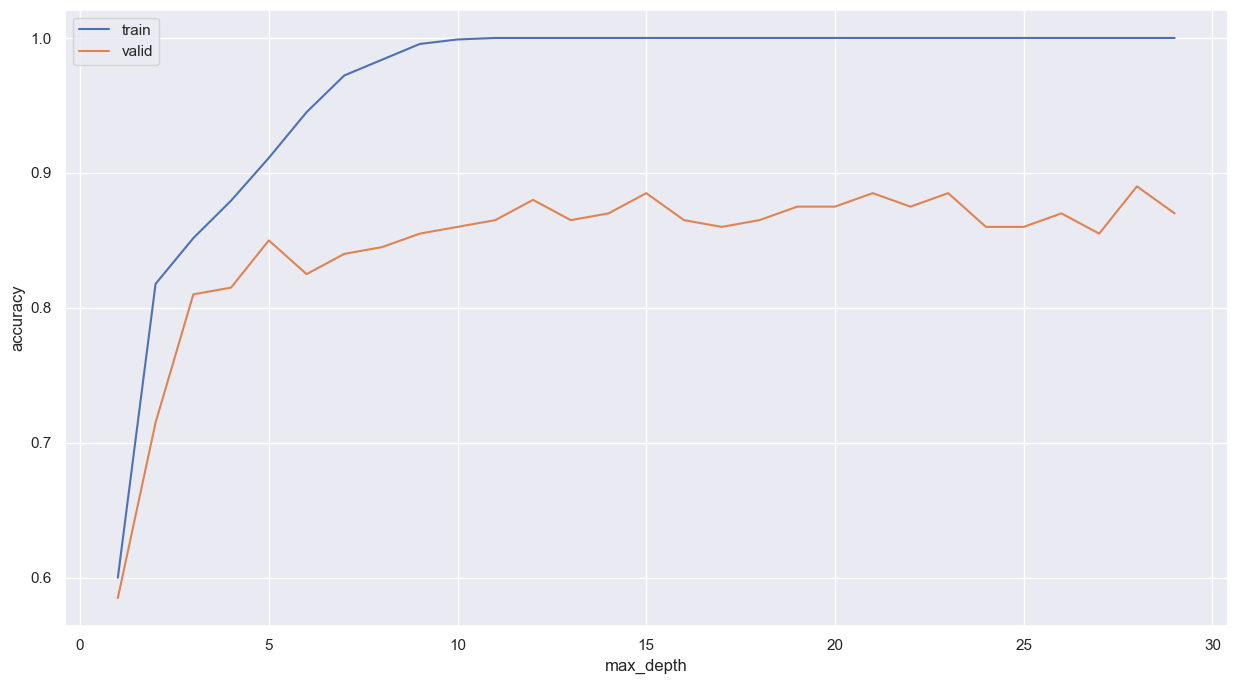

In [78]:
max_depth = []
acc_train = []
acc_test = []
for i in range(1,30):
        dtree = RandomForestClassifier(criterion='gini', max_depth=i)
        dtree.fit(X_train, y_train)
        pred = dtree.predict(X_train)
        acc_train.append(accuracy_score(y_train, pred))
 ####
        dtree = RandomForestClassifier(criterion='gini', max_depth=i)
        dtree.fit(X_train, y_train)
        pred = dtree.predict(X_valid)
        acc_test.append(accuracy_score(y_valid, pred))
 ####
        max_depth.append(i)
d = pd.DataFrame({'acc_train':pd.Series(acc_train), 
         'acc_test':pd.Series(acc_test),
         'max_depth':pd.Series(max_depth)})# visualizing changes in parameters
plt.plot('max_depth','acc_train', data=d, label='train')
plt.plot('max_depth','acc_test', data=d, label='valid')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [81]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 5, cv = 5, random_state=42, n_jobs = -1)# Fit the random search model


In [82]:
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='accuracy')

In [83]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': False}

In [86]:
train_pred=rf_random.predict(X_train)
test_pred=rf_random.predict(X_valid)

In [88]:
(accuracy_score(y_train, train_pred),accuracy_score(y_valid, test_pred)) 

(1.0, 0.855)

In [71]:
confusion_matrix(y_test,test_pred)

array([[42,  0,  0,  0],
       [ 3, 40,  7,  0],
       [ 0,  7, 36,  4],
       [ 0,  0,  4, 57]], dtype=int64)

# SVM

In [90]:
l=[]
accur=[]
i=0
for c in ([0.1,0.5,0.1,1,2,5,10,50,100,500,1000]):
    clf = SVC(kernel='linear',C=c)
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_valid)
    accur.append(accuracy_score(y_valid, predictions))
    i=i+1
    l.append(i)

In [91]:
l=[]
accur_poly=[]
i=0
for c in ([0.1,0.5,0.1,1,2,5,10,50,100,500,1000]):
    clf = SVC(kernel='poly',C=c)
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_valid)
    accur_poly.append(accuracy_score(y_valid, predictions))
    i=i+1
    l.append(i)

In [92]:
l=[]
accur_rbf=[]
i=0
for c in ([0.1,0.5,0.1,1,2,5,10,50,100,500,1000]):
    clf = SVC(kernel='rbf',C=c)
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_valid)
    accur_rbf.append(accuracy_score(y_valid, predictions))
    i=i+1
    l.append(i)

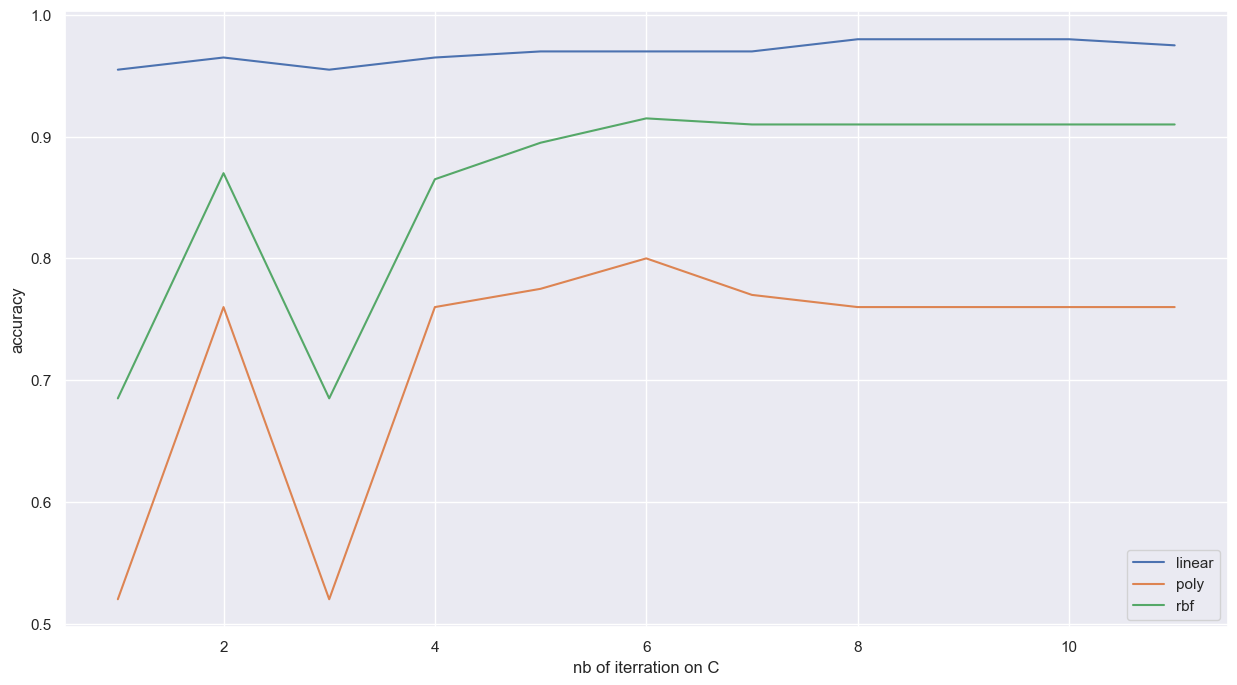

In [93]:
plt.plot(l,accur, label='linear')
plt.plot(l,accur_poly, label='poly')
plt.plot(l,accur_rbf, label='rbf')
plt.xlabel('nb of iterration on C')
plt.ylabel('accuracy')
plt.legend()

In [95]:
model_svm = SVC(kernel='linear',C=10)
model_svm.fit(X_train,y_train)

SVC(C=10, kernel='linear')

In [96]:
train_pred=model_svm.predict(X_train)
test_pred=model_svm.predict(X_valid)
(accuracy_score(y_train, train_pred),accuracy_score(y_valid, test_pred))

(0.9838888888888889, 0.97)

# KNN

C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

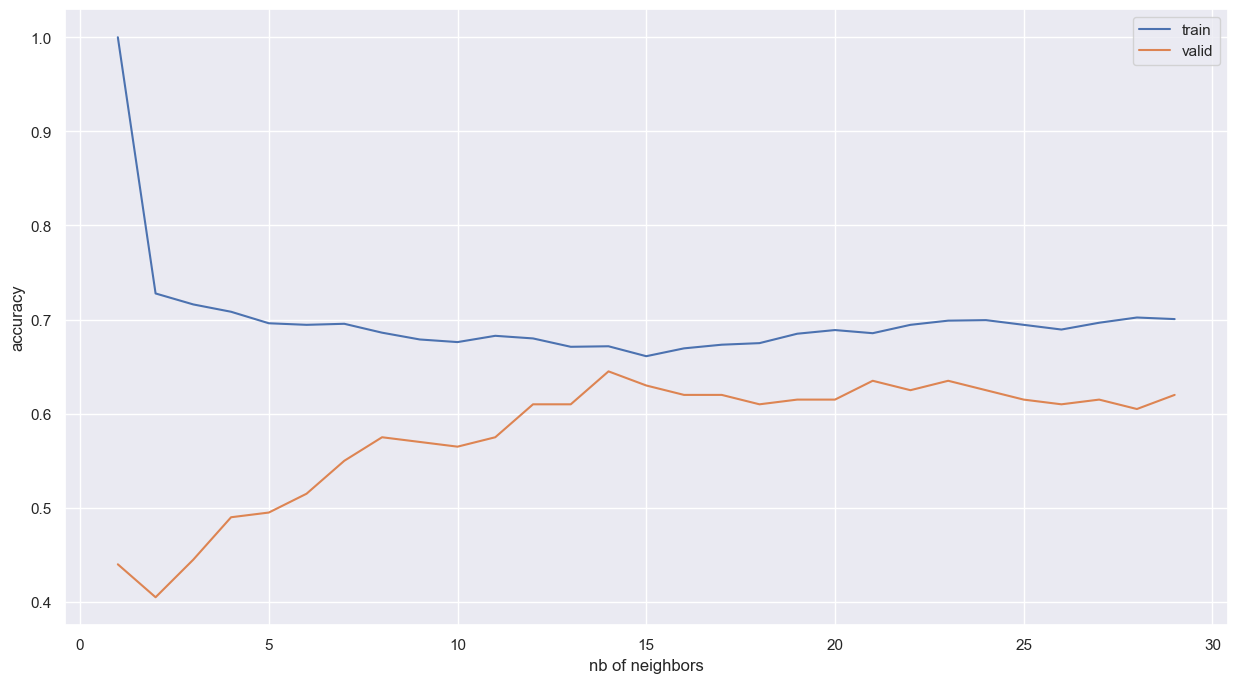

In [105]:
accur_train=[]
accur_valid=[]
l=[]
for i in range(1,30):
    model_knn= KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train,y_train)
    train_pred=model_knn.predict(X_train)
    test_pred=model_knn.predict(X_valid)
    score_train=accuracy_score(y_train, train_pred)
    score_valid=accuracy_score(y_valid, test_pred)
    accur_train.append(score_train)
    accur_valid.append(score_valid)
    l.append(i)
    
    
plt.plot(l,accur_train, label='train')
plt.plot(l,accur_valid, label='valid')
plt.xlabel('nb of neighbors')
plt.ylabel('accuracy')
plt.legend()

In [100]:
train_pred=model_knn.predict(X_train)
test_pred=model_knn.predict(X_valid)
(accuracy_score(y_train, train_pred),accuracy_score(y_valid, test_pred))

C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

(0.7083333333333334, 0.49)

# Sélection de variables pour les modèles utilisant des distances

In [106]:
X_train_r=X_train[["ram","battery_power","px_height","px_width"]]
X_valid_r=X_valid[["ram","battery_power","px_height","px_width"]]

C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

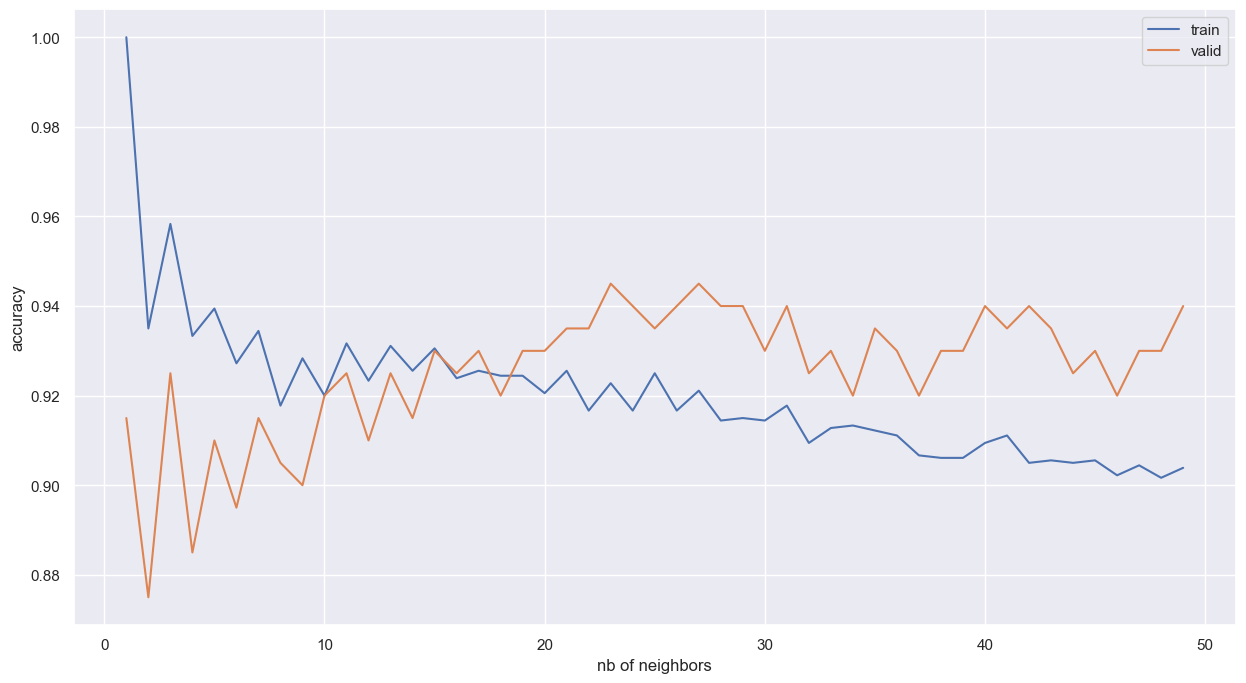

In [110]:
accur_train=[]
accur_valid=[]
l=[]
for i in range(1,50):
    model_knn= KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train_r,y_train)
    train_pred=model_knn.predict(X_train_r)
    test_pred=model_knn.predict(X_valid_r)
    score_train=accuracy_score(y_train, train_pred)
    score_valid=accuracy_score(y_valid, test_pred)
    accur_train.append(score_train)
    accur_valid.append(score_valid)
    l.append(i)
    
    
plt.plot(l,accur_train, label='train')
plt.plot(l,accur_valid, label='valid')
plt.xlabel('nb of neighbors')
plt.ylabel('accuracy')
plt.legend()

In [122]:
model_knn= KNeighborsClassifier(n_neighbors=23)
model_knn.fit(X_train_r,y_train)
train_pred=model_knn.predict(X_train_r)
test_pred_knn=model_knn.predict(X_valid_r)
(accuracy_score(y_train, train_pred),accuracy_score(y_valid, test_pred_knn))

C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\coich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

(0.9227777777777778, 0.945)

In [108]:
l=[]
accur=[]
i=0
for c in ([0.1,0.5,0.1,1,2,5,10,50,100,500,1000]):
    clf = SVC(kernel='linear',C=c)
    clf.fit(X_train_r, y_train)
    predictions=clf.predict(X_valid_r)
    accur.append(accuracy_score(y_valid, predictions))
    i=i+1
    l.append(i)

In [111]:
l=[]
accur_poly=[]
i=0
for c in ([0.1,0.5,0.1,1,2,5,10,50,100,500,1000]):
    clf = SVC(kernel='poly',C=c)
    clf.fit(X_train_r, y_train)
    predictions=clf.predict(X_valid_r)
    accur_poly.append(accuracy_score(y_valid, predictions))
    i=i+1
    l.append(i)

In [112]:
l=[]
accur_rbf=[]
i=0
for c in ([0.1,0.5,0.1,1,2,5,10,50,100,500,1000]):
    clf = SVC(kernel='rbf',C=c)
    clf.fit(X_train_r, y_train)
    predictions=clf.predict(X_valid_r)
    accur_rbf.append(accuracy_score(y_valid, predictions))
    i=i+1
    l.append(i)

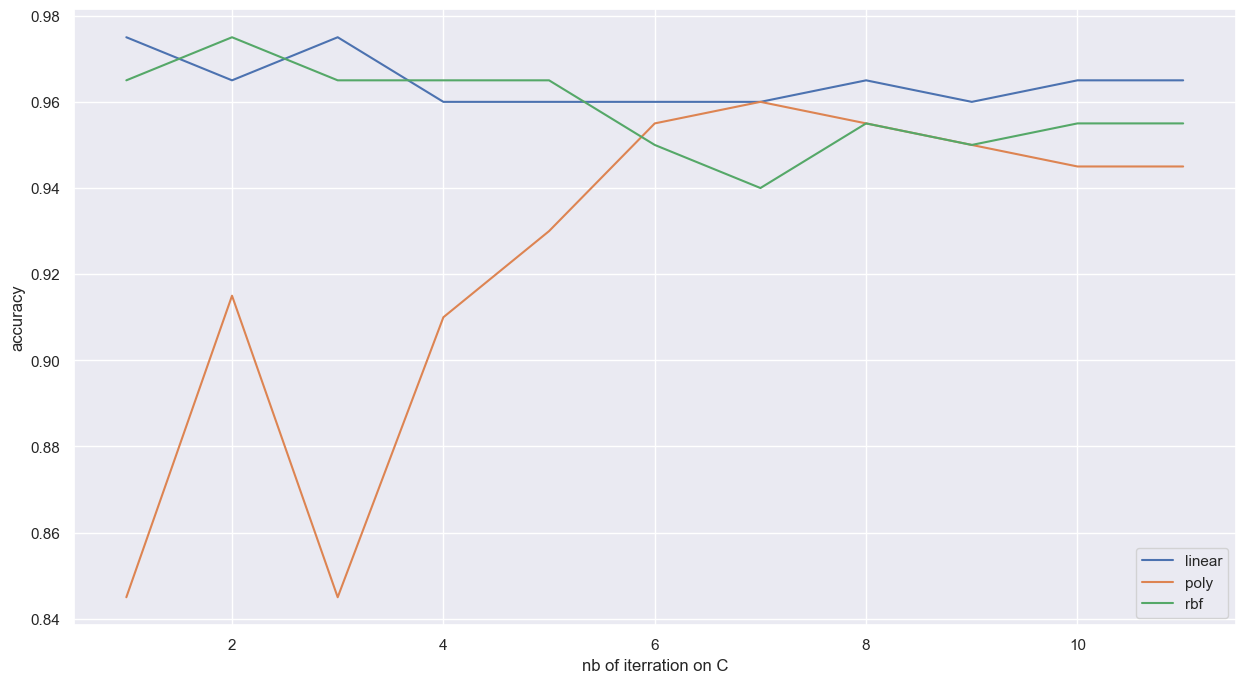

In [113]:
plt.plot(l,accur, label='linear')
plt.plot(l,accur_poly, label='poly')
plt.plot(l,accur_rbf, label='rbf')
plt.xlabel('nb of iterration on C')
plt.ylabel('accuracy')
plt.legend()

In [121]:
model_svm=SVC(kernel='linear',C=0.1)
model_svm.fit(X_train_r,y_train)
model_svm.predict(X_valid_r)
train_pred=model_svm.predict(X_train_r)
test_pred_svm=model_svm.predict(X_valid_r)
(accuracy_score(y_train, train_pred),accuracy_score(y_valid, test_pred_svm))

(0.9561111111111111, 0.975)

In [136]:
model_svm2 = SVC(kernel='linear',C=10)
model_svm2.fit(X_train,y_train)
test_pred_svm2=model_svm2.predict(X_valid)

In [137]:
ensemble=test_pred_svm+test_pred_knn+test_pred_svm2

In [138]:
ensemble

array([9, 0, 6, 6, 6, 0, 0, 9, 9, 3, 3, 9, 0, 6, 9, 0, 9, 6, 6, 3, 0, 0,
       9, 3, 6, 6, 9, 3, 9, 3, 3, 0, 6, 0, 4, 9, 0, 0, 9, 9, 6, 3, 9, 8,
       3, 9, 0, 3, 9, 3, 3, 9, 0, 9, 0, 7, 6, 6, 0, 9, 9, 3, 9, 6, 3, 6,
       9, 6, 6, 6, 9, 6, 3, 0, 3, 9, 6, 5, 3, 6, 9, 9, 9, 0, 0, 0, 6, 3,
       6, 9, 3, 6, 6, 3, 0, 8, 9, 9, 0, 9, 4, 3, 8, 3, 9, 6, 6, 9, 6, 9,
       8, 0, 0, 3, 8, 9, 0, 0, 3, 0, 0, 9, 6, 6, 3, 4, 3, 3, 0, 6, 3, 9,
       7, 9, 9, 9, 9, 6, 0, 3, 3, 6, 3, 9, 0, 9, 0, 0, 6, 0, 3, 3, 4, 3,
       9, 0, 0, 9, 3, 9, 6, 3, 9, 3, 6, 9, 9, 6, 3, 0, 9, 4, 6, 9, 9, 0,
       6, 6, 9, 0, 6, 3, 0, 3, 6, 3, 6, 0, 9, 9, 3, 3, 0, 6, 9, 0, 3, 7,
       6, 0], dtype=int64)

In [139]:
ensemble=ensemble/3
ensemble

array([3.        , 0.        , 2.        , 2.        , 2.        ,
       0.        , 0.        , 3.        , 3.        , 1.        ,
       1.        , 3.        , 0.        , 2.        , 3.        ,
       0.        , 3.        , 2.        , 2.        , 1.        ,
       0.        , 0.        , 3.        , 1.        , 2.        ,
       2.        , 3.        , 1.        , 3.        , 1.        ,
       1.        , 0.        , 2.        , 0.        , 1.33333333,
       3.        , 0.        , 0.        , 3.        , 3.        ,
       2.        , 1.        , 3.        , 2.66666667, 1.        ,
       3.        , 0.        , 1.        , 3.        , 1.        ,
       1.        , 3.        , 0.        , 3.        , 0.        ,
       2.33333333, 2.        , 2.        , 0.        , 3.        ,
       3.        , 1.        , 3.        , 2.        , 1.        ,
       2.        , 3.        , 2.        , 2.        , 2.        ,
       3.        , 2.        , 1.        , 0.        , 1.     

In [141]:
pred_ens=[]
for i in ensemble :
    i=round(i)
    pred_ens.append(i)

In [142]:
accuracy_score(y_valid,pred_ens)

0.98

# Bingo !!!! on gagne encore 0.5 % d'accuracy ( évidemment le résultat dépend de la distribution de l'échantillon validation/test, on pourrait très bien améliorer un petit peu le SVM avec sélection de variables ou le rendre un peu moins performants)